Jeyavvanth.R         
21BCE2472

In [27]:
#Jeyavvanth.R
#21BCE2472
#Importing required libraries
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [ ]:
#Loading the dataset
df=pd.read_csv("/content/winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Data preprocessing and visualisation

In [4]:
#Data Preprocessing and visualisation

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [14]:
df.shape

(1599, 12)

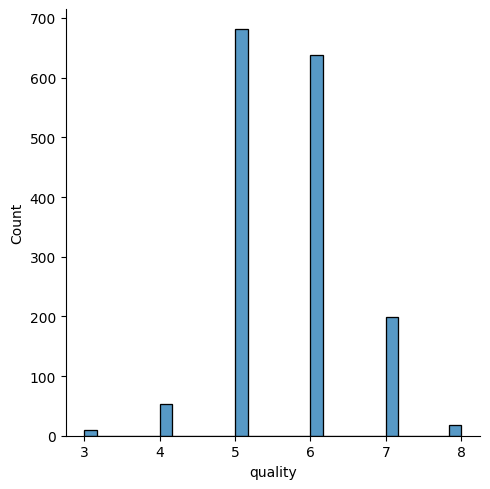

In [18]:
sns.displot(df["quality"])

<ipython-input-19-d020e64af2d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pH'])


<Axes: xlabel='pH', ylabel='Density'>

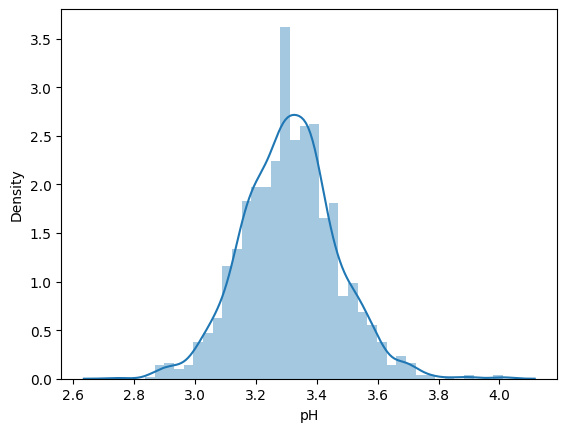

In [19]:
sns.distplot(df['pH'])

<ipython-input-21-cffea316cede>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['density'])


<Axes: xlabel='density', ylabel='Density'>

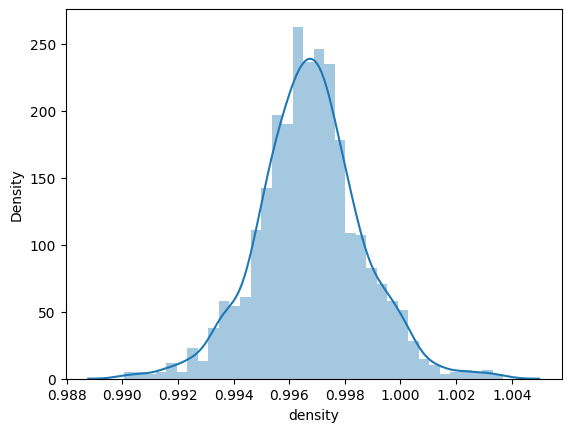

In [21]:
sns.distplot(df['density'])

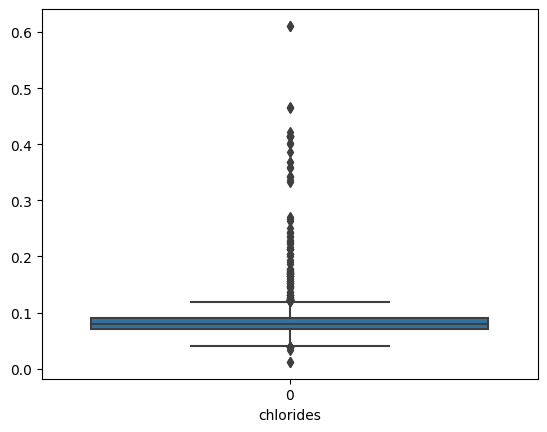

In [28]:
sns.boxplot(df['chlorides'])
plt.xlabel('chlorides')
plt.show()

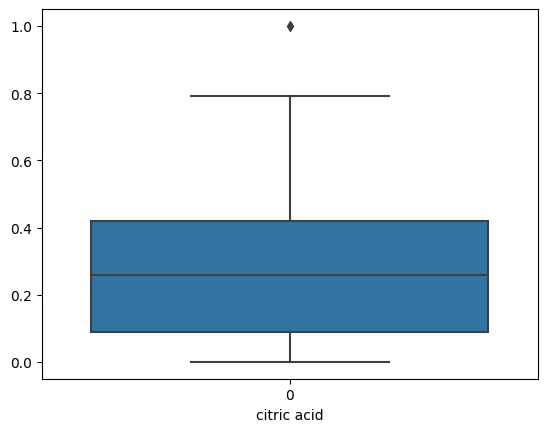

In [29]:
sns.boxplot(df['citric acid'])
plt.xlabel('citric acid')
plt.show()

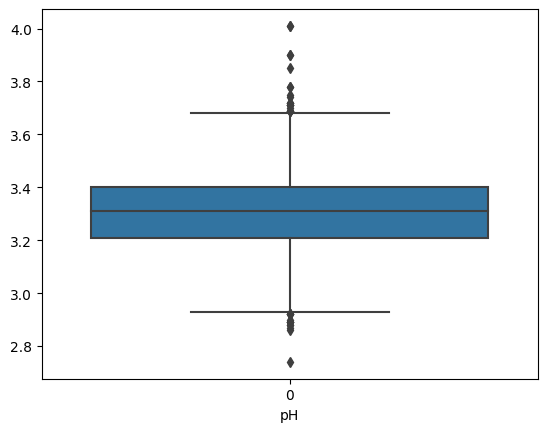

In [22]:
sns.boxplot(df['pH'])
plt.xlabel('pH')
plt.show()

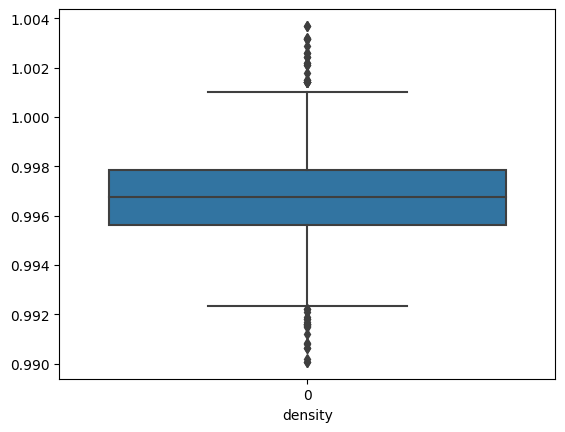

In [23]:
sns.boxplot(df['density'])
plt.xlabel('density')
plt.show()

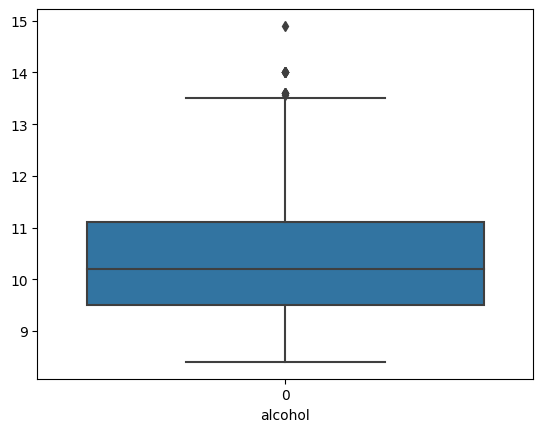

In [25]:
sns.boxplot(df['alcohol'])
plt.xlabel('alcohol')
plt.show()

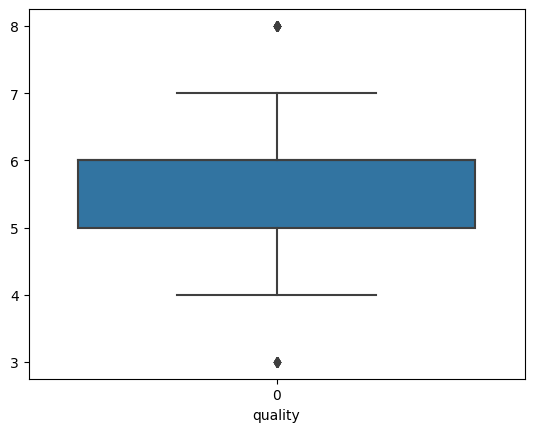

In [26]:
sns.boxplot(df['quality'])
plt.xlabel('quality')
plt.show()

Removing outliers

In [47]:
columns_with_outliers = ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','quality']
threshold = 3
filtered_data = df.copy()

for i in columns_with_outliers:
    z_scores = np.abs(stats.zscore(df[i]))
    df2 = df2[(z_scores < threshold)]

print(f'Original dataset shape: {df.shape}')
print(f'Dataset shape after removing outliers: {df2.shape}')

Original dataset shape: (1599, 12)
Dataset shape after removing outliers: (1472, 12)


<ipython-input-47-6ce71c65e038>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(z_scores < threshold)]


Understanding correlation

In [34]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

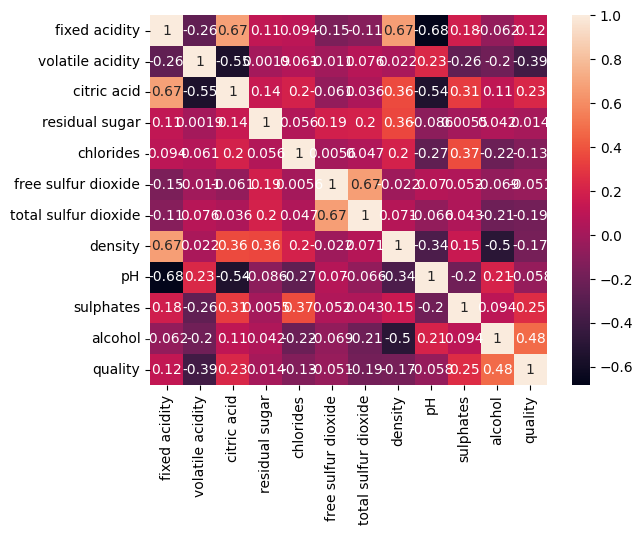

In [37]:
sns.heatmap(df.corr(),annot=True)

Bivariate analysis

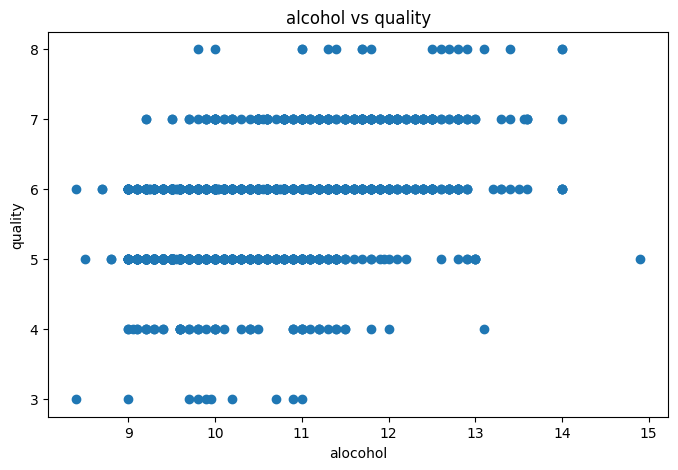

In [50]:
x= df['alcohol']
y= df['quality']
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('alcohol vs quality')
plt.xlabel('alocohol')
plt.ylabel('quality')
plt.show()

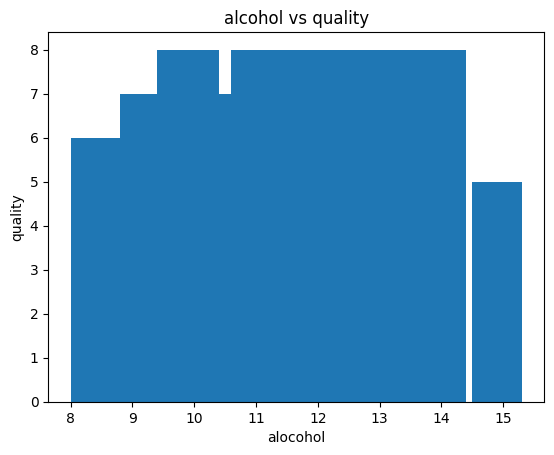

In [52]:
plt.bar(x,y)
plt.title('alcohol vs quality')
plt.xlabel('alocohol')
plt.ylabel('quality')
plt.show()

Multivariate analysis

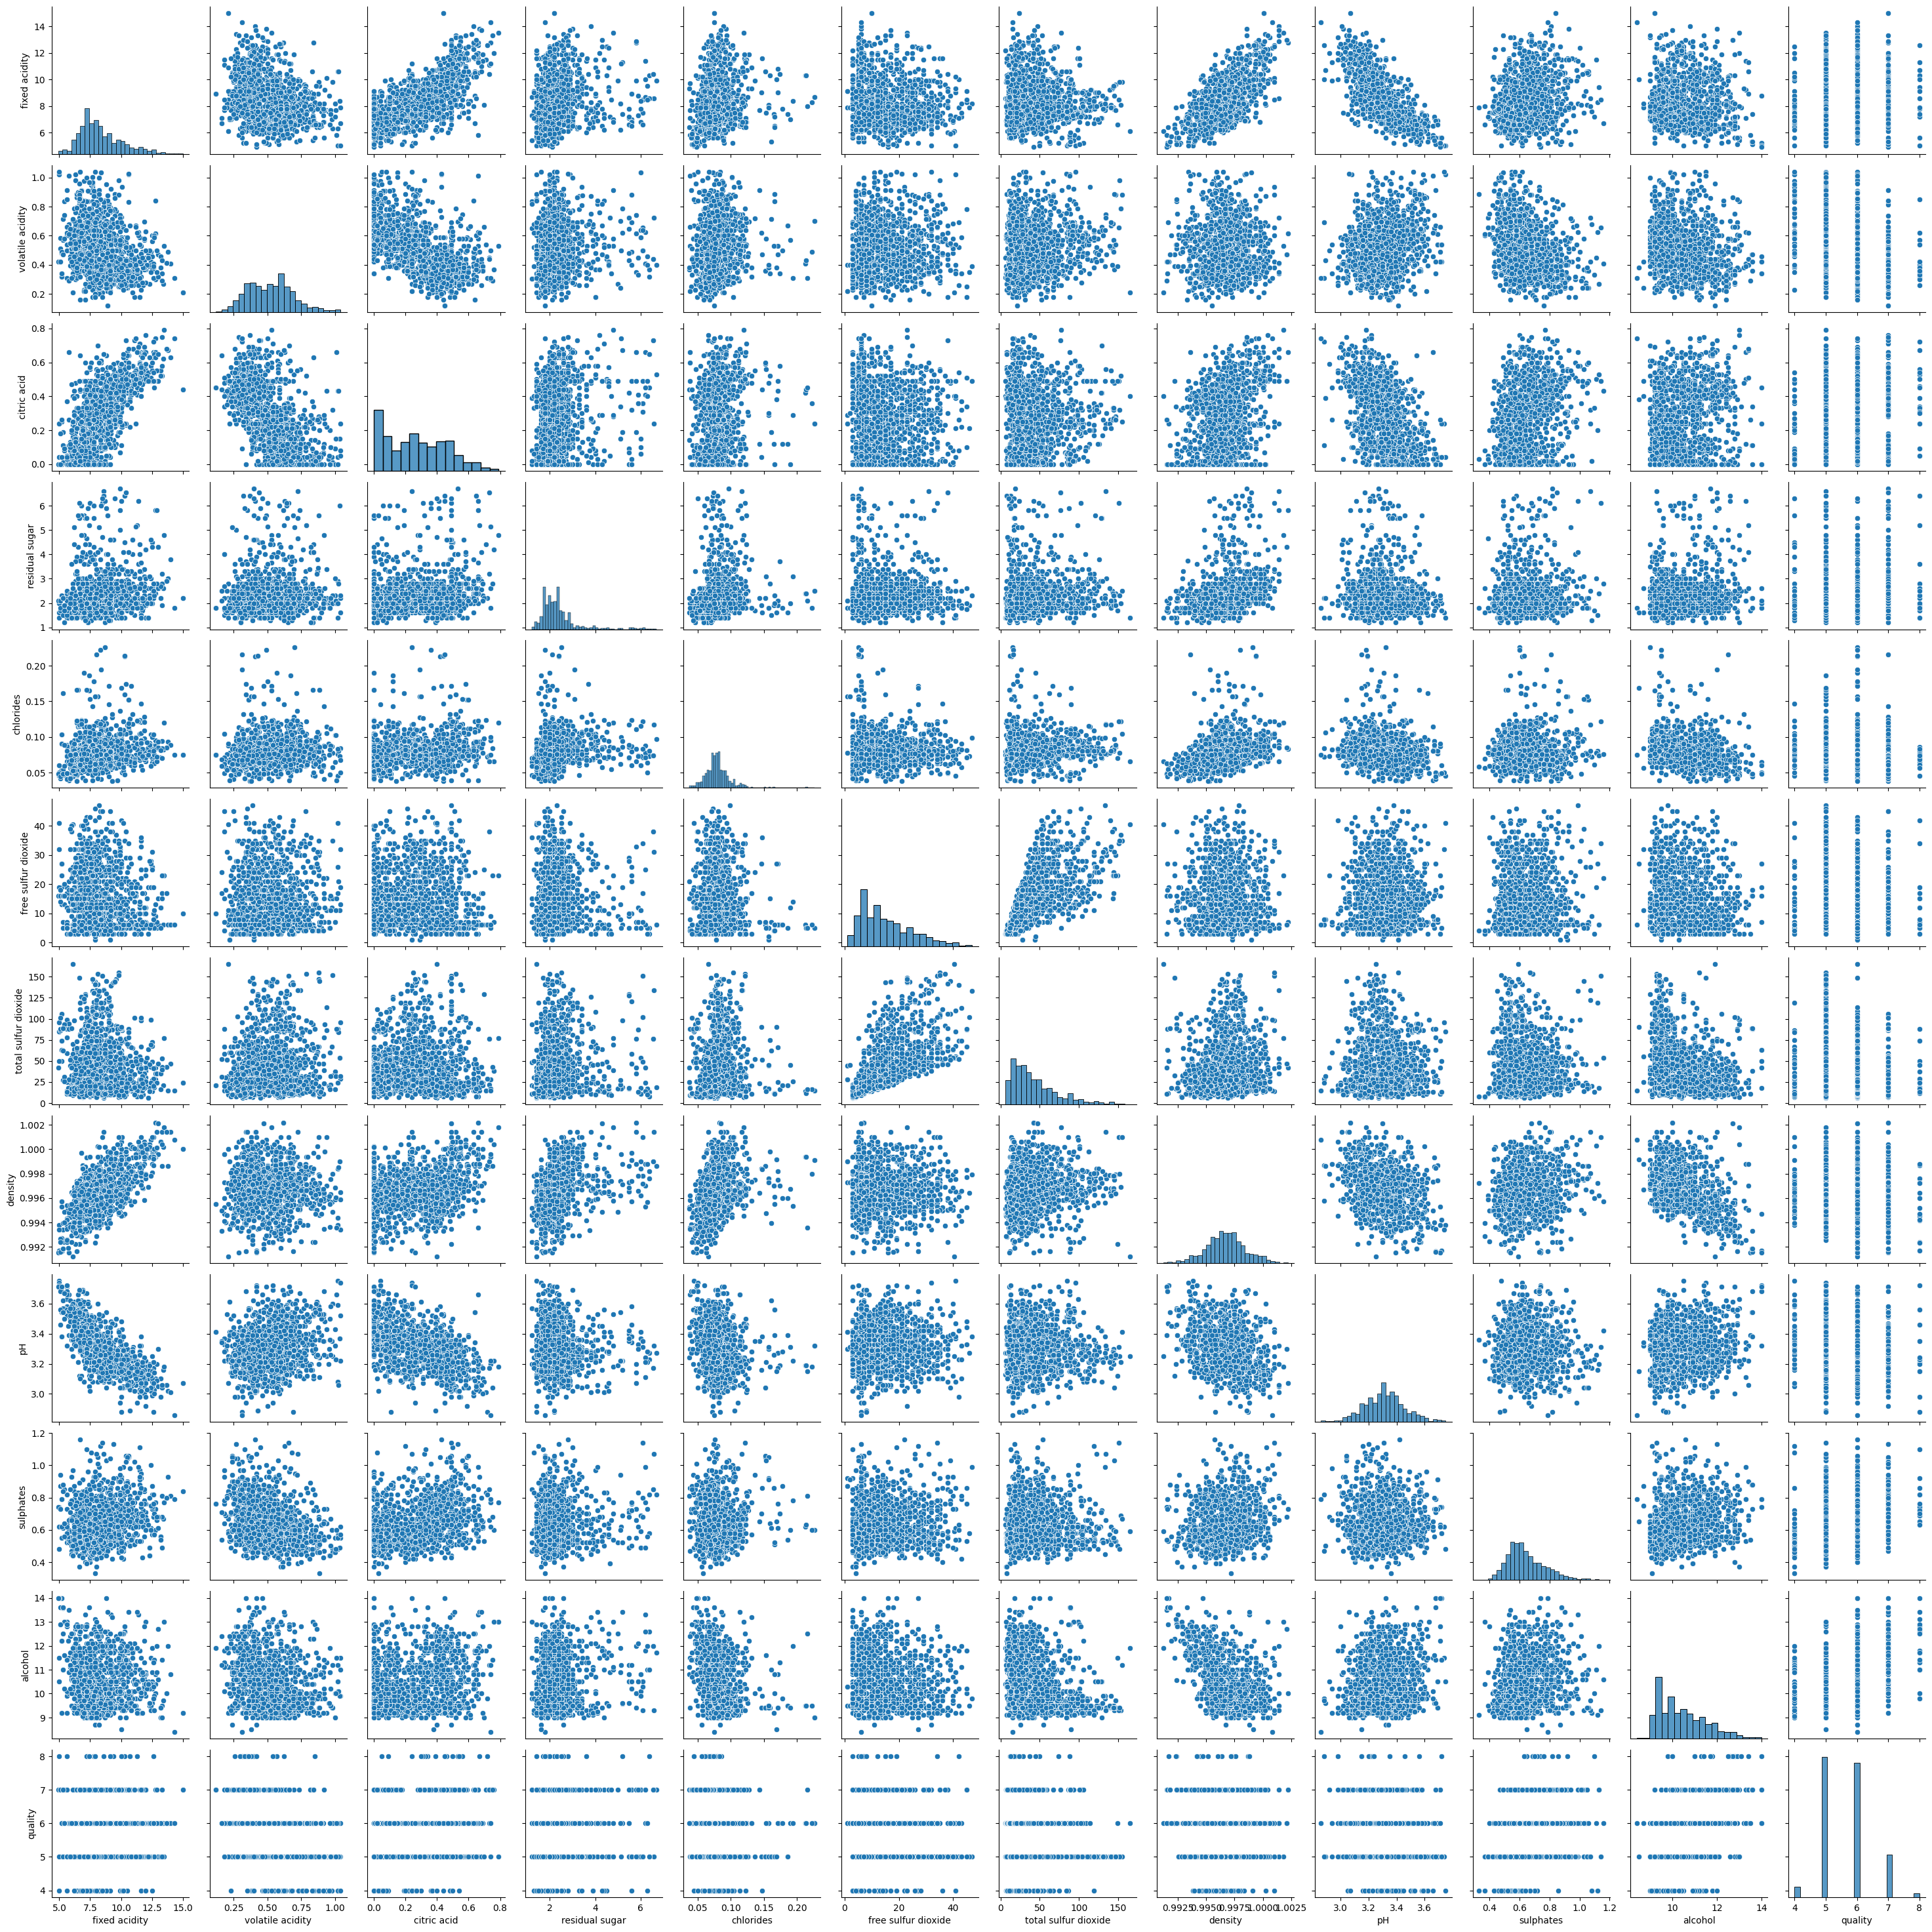

In [53]:
# c) Multivariate Analysis

sns.pairplot(df2)

plt.show()

Machine Learning Model building

In [56]:
#Splitting into independant and dependant variables
X = df2.drop('quality', axis=1)
y = df2['quality']
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [57]:
y.head(7)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
Name: quality, dtype: int64

In [58]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
scaled_x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247525          0.630435     0.000000        0.127273   0.202128   
1       0.287129          0.826087     0.000000        0.254545   0.319149   
2       0.287129          0.695652     0.050633        0.200000   0.287234   
3       0.623762          0.173913     0.708861        0.127273   0.196809   
4       0.247525          0.630435     0.000000        0.127273   0.202128   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.217391              0.176101  0.600000  0.730337   0.277108   
1             0.521739              0.383648  0.509091  0.382022   0.421687   
2             0.304348              0.301887  0.527273  0.449438   0.385542   
3             0.347826              0.339623  0.618182  0.337079   0.301205   
4             0.217391              0.176101  0.600000  0.730337   0.277108   

    alcohol  
0  0.178571  
1  0.250000  
2  0.250000  
3  0.250000  
4  0.178571

In [64]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.3,random_state = 10)
x_train.shape

(1030, 11)

In [67]:
x_test.shape

(442, 11)

In [69]:
y_train.shape

(1030,)

In [70]:
y_test.shape

(442,)

In [72]:
#Machine learning model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

Evaluate the model

In [75]:
#Evaluating the model
y_pred = model.predict(x_test)
y_pred

array([5.29, 6.3 , 5.11, 5.07, 5.74, 5.15, 5.07, 6.93, 4.85, 5.5 , 5.88,
       6.07, 5.15, 5.13, 6.32, 5.87, 5.8 , 5.13, 6.14, 5.13, 6.71, 6.13,
       5.24, 5.51, 6.93, 5.48, 5.4 , 5.98, 6.32, 5.03, 5.93, 5.13, 5.97,
       5.11, 5.94, 5.14, 6.07, 5.25, 5.46, 6.52, 5.2 , 5.04, 6.04, 6.46,
       6.1 , 5.96, 5.83, 5.2 , 6.04, 6.11, 5.57, 5.15, 5.36, 6.04, 6.83,
       5.07, 5.12, 6.5 , 5.5 , 6.21, 5.39, 5.06, 5.56, 5.8 , 6.17, 6.02,
       6.73, 5.12, 5.67, 5.37, 5.58, 5.36, 5.2 , 6.23, 5.24, 6.01, 4.78,
       4.98, 5.85, 5.02, 5.97, 6.  , 5.14, 5.85, 5.18, 6.41, 5.33, 5.8 ,
       6.16, 5.06, 5.31, 5.92, 4.95, 5.48, 6.14, 5.39, 5.4 , 5.02, 5.25,
       5.52, 6.  , 5.27, 5.18, 6.03, 6.53, 6.1 , 5.45, 6.1 , 6.69, 5.65,
       5.99, 6.93, 5.88, 6.72, 4.86, 5.82, 5.6 , 6.91, 5.55, 5.  , 5.66,
       5.37, 5.17, 5.41, 6.62, 6.3 , 5.9 , 6.17, 6.6 , 6.83, 5.46, 5.63,
       5.99, 5.01, 6.  , 5.31, 5.13, 5.34, 5.04, 6.2 , 6.1 , 5.89, 5.54,
       6.91, 5.23, 5.12, 5.48, 6.37, 5.14, 5.13, 6.

In [76]:
y_test

847     6
1575    6
620     5
656     5
1591    6
       ..
63      5
719     5
585     6
977     5
871     5
Name: quality, Length: 442, dtype: int64

In [77]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.30
R-squared (R2): 0.52


Test with random observation

In [84]:
#Testing with random observation
new_observation = {
    'fixed acidity': 7.2,
    'volatile acidity': 0.66,
    'citric acid': 0.07,
    'residual sugar': 2.8,
    'chlorides': 0.092,
    'free sulfur dioxide': 22,
    'total sulfur dioxide': 50,
    'density': 0.800,
    'pH': 3.33,
    'sulphates': 0.61,
    'alcohol': 9.8
}
new_data = pd.DataFrame([new_observation])
new_prediction = model.predict(new_data)
print(f'Predicted wine quality: {new_prediction[0]}')

Predicted wine quality: 6.37


Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Evaluate the Model
y_pred2 = model2.predict(x_test)
y_pred2

array([5, 6, 5, 5, 5, 5, 5, 7, 4, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       5, 5, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 7,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 6,
       7, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 7, 6,
       5, 6, 6, 7, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 7, 6, 6, 7, 7, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 7, 6, 6, 7,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 5,
       5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 7,
       6, 5, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7,
       6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 5, 7, 5, 6, 6, 7, 7, 6, 5, 5,

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [89]:
# Generate a classification report
report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.75      0.80      0.77       192
           6       0.66      0.72      0.69       173
           7       0.71      0.60      0.65        57
           8       1.00      0.25      0.40         4

    accuracy                           0.71       442
   macro avg       0.62      0.47      0.50       442
weighted avg       0.68      0.71      0.69       442

